In [1]:
import os
import re
import glob
from natsort import natsorted
from itertools import combinations

import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist, squareform

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", font_scale=1.2)

In [2]:
def determine_valence_median_split(row):
    pos_val = row.get("valence_positive", 0)
    neg_val = row.get("valence_negative", 0)
    
    pos = pos_val > 0
    neg = neg_val > 0
    
    # Ambiguous if both pos and neg present
    if pos and neg:
        return "ambiguous"
    
    # Positive valence only
    if pos and not neg:
        if pos_val > pos_median:
            return "highpositive"
        else:
            return "lowpositive"
    
    # Negative valence only
    if neg and not pos:
        if neg_val > neg_median:
            return "highnegative"
        else:
            return "lownegative"
    return "neutral"

In [3]:
in_paths = glob.glob(
    os.path.join("/home", "exp-psy", "Desktop", "study_face_tracks", "derivatives", "reference_face-emotions", "emotions_av_1s_events_run-*_events.tsv")
)

In [4]:
df_list = []
for fp in natsorted(in_paths):
    run_match = re.search(r'run-(\d+)', fp)
    run = int(run_match.group(1)) if run_match else None
    df = pd.read_csv(fp, sep='\t')
    df['run'] = run
    df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df.head(10)

,onset,duration,character,arousal,valence_positive,valence_negative,c_audio,c_context,c_face,c_gesture,...,e_love,e_pity/compassion,e_pride,e_relief,e_remorse,e_resent,e_sadness,e_satisfaction,e_shame,run
0,192.0,12.0,FORREST,-0.666667,0.666667,0.000000,0.111111,0.0,0.444444,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,204.0,2.0,FORREST,-0.777778,0.777778,0.000000,0.111111,0.0,0.444444,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,206.0,3.0,FORREST,-0.666667,0.888889,0.000000,0.222222,0.0,0.444444,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,209.0,16.0,FORREST,-0.333333,0.555556,0.000000,0.111111,0.0,0.333333,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,225.0,15.0,FORREST,-0.555556,0.555556,0.000000,0.111111,0.0,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,238.0,1.0,WOMAN,-0.555556,0.000000,0.555556,0.000000,0.0,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,239.0,1.0,WOMAN,-0.555556,0.000000,0.555556,0.000000,0.0,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,240.0,1.0,WOMAN,-0.666667,0.000000,0.666667,0.000000,0.0,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,241.0,1.0,WOMAN,-0.555556,0.000000,0.555556,0.000000,0.0,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,245.0,15.0,FORREST,-0.555556,0.555556,0.000000,0.111111,0.0,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
pos_vals = merged_df.loc[merged_df['valence_positive'] > 0, 'valence_positive']
neg_vals = merged_df.loc[merged_df['valence_negative'] > 0, 'valence_negative']

pos_median = pos_vals.median()
neg_median = neg_vals.median()

pos_median, neg_median

(np.float64(0.555555555556), np.float64(0.555555555556))

In [6]:
merged_df["trial_type"] = merged_df.apply(determine_valence_median_split, axis=1)
merged_df.head(10)

,onset,duration,character,arousal,valence_positive,valence_negative,c_audio,c_context,c_face,c_gesture,...,e_pity/compassion,e_pride,e_relief,e_remorse,e_resent,e_sadness,e_satisfaction,e_shame,run,trial_type
0,192.0,12.0,FORREST,-0.666667,0.666667,0.000000,0.111111,0.0,0.444444,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,highpositive
1,204.0,2.0,FORREST,-0.777778,0.777778,0.000000,0.111111,0.0,0.444444,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,highpositive
2,206.0,3.0,FORREST,-0.666667,0.888889,0.000000,0.222222,0.0,0.444444,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,highpositive
3,209.0,16.0,FORREST,-0.333333,0.555556,0.000000,0.111111,0.0,0.333333,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,lowpositive
4,225.0,15.0,FORREST,-0.555556,0.555556,0.000000,0.111111,0.0,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,lowpositive
5,238.0,1.0,WOMAN,-0.555556,0.000000,0.555556,0.000000,0.0,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,lownegative
6,239.0,1.0,WOMAN,-0.555556,0.000000,0.555556,0.000000,0.0,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,lownegative
7,240.0,1.0,WOMAN,-0.666667,0.000000,0.666667,0.000000,0.0,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,highnegative
8,241.0,1.0,WOMAN,-0.555556,0.000000,0.555556,0.000000,0.0,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,lownegative
9,245.0,15.0,FORREST,-0.555556,0.555556,0.000000,0.111111,0.0,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,lowpositive


In [7]:
distance_matrices = []
conditions = np.unique(merged_df["trial_type"])
n_conditions = len(conditions)
runs = sorted(merged_df["run"].unique())

print(f"conditions: {conditions}, number of conditions: {n_conditions}, number of runs: {runs}")

conditions: ['ambiguous' 'highnegative' 'highpositive' 'lownegative' 'lowpositive'], number of conditions: 5, number of runs: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]


In [8]:
# leave-one-run-out cross-validation
for test_run in runs:
    train_df = merged_df[merged_df["run"] != test_run]
    test_df = merged_df[merged_df["run"] == test_run]

    train_means = train_df.groupby('trial_type')[['valence_positive', 'valence_negative']].mean()
    test_means = test_df.groupby('trial_type')[['valence_positive', 'valence_negative']].mean()

    train_vecs = train_means.loc[conditions].values
    test_vecs = test_means.loc[conditions].values

    cross_dists = cdist(train_vecs, test_vecs, metric='euclidean')

    symmetric_matrix = (cross_dists + cross_dists.T) / 2.0
    distance_matrices.append(symmetric_matrix)

final_distance_matrix = np.mean(distance_matrices, axis=0)

# for plotting
distance_df = pd.DataFrame(final_distance_matrix, index=conditions, columns=conditions)

# for computation
flat_distances = squareform(final_distance_matrix, checks=False)

print(distance_df.round(4))

              ambiguous  highnegative  highpositive  lownegative  lowpositive
ambiguous        0.1024        0.5488        0.5979       0.3916       0.4613
highnegative     0.5488        0.0195        1.1446       0.2704       0.9954
highpositive     0.5979        1.1446        0.0257       0.9677       0.2367
lownegative      0.3916        0.2704        0.9677       0.0000       0.7857
lowpositive      0.4613        0.9954        0.2367       0.7857       0.0000


In [9]:
flat_distances.shape
np.save("flat_crossval_distances.npy", final_distance_matrix)

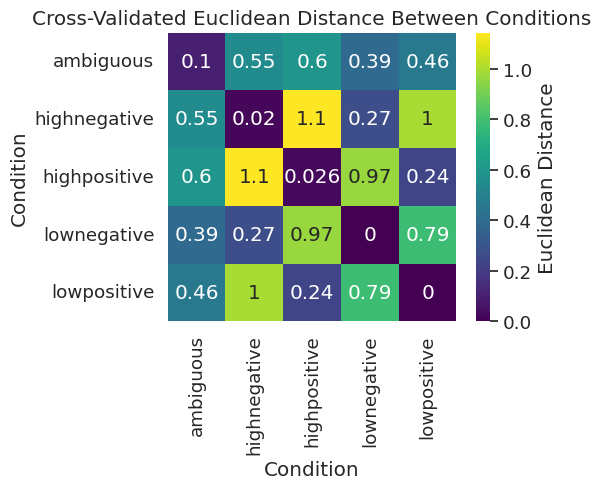

In [10]:
plt.figure(figsize=(6, 5))
ax = sns.heatmap(distance_df, annot=True, cmap="viridis", square=True, cbar_kws={'label': 'Euclidean Distance'})

# Customize labels
plt.title("Cross-Validated Euclidean Distance Between Conditions")
plt.ylabel("Condition")
plt.xlabel("Condition")

plt.tight_layout()
plt.show()